In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [50]:
df = pd.read_csv("dados_limpos.csv", encoding="latin1", delimiter=";", parse_dates=['DATA'])
df.head()

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,13,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,18,ACIR GURGACZ,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,ACIR GURGACZ,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,16,ACIR GURGACZ,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,ACIR GURGACZ,Aquisição de material,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00


In [51]:
df.dtypes

ANO                           int64
MES                           int64
DIA                           int64
SENADOR                      object
TIPO_DESPESA                 object
CNPJ_CPF                     object
FORNECEDOR                   object
DOCUMENTO                    object
DATA                 datetime64[ns]
DETALHAMENTO                 object
VALOR_REEMBOLSADO           float64
dtype: object

In [52]:
df.describe()

,ANO,MES,DIA,VALOR_REEMBOLSADO
count,26688.0,26688.000000,26688.000000,26688.000000
mean,2016.0,6.470736,15.430680,947.489558
std,0.0,3.257139,8.846572,2733.963252
min,2016.0,1.000000,1.000000,0.010000
25%,2016.0,4.000000,8.000000,123.997500
50%,2016.0,6.000000,15.000000,324.745000
75%,2016.0,9.000000,23.000000,956.762500
max,2016.0,12.000000,31.000000,256980.000000


In [53]:
df[df["VALOR_REEMBOLSADO"] == 0.01]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
6847,2016,3,22,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,NFPJ4Z,2016-03-22,"Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...",0.01
6848,2016,3,30,FERNANDO BEZERRA COELHO,Passagens,07.575.651/0001-59,GOL,OEI85P,2016-03-30,"Companhia Aérea: GOL, Localizador: OEI85P. Pas...",0.01
11278,2016,6,6,JORGE VIANA,Passagens,33.937.681/0001-78,LATAM,3EY28M,2016-02-06,"Companhia Aérea: LATAM, Localizador: 3EY28M. P...",0.01
11494,2016,12,17,JORGE VIANA,Passagens,07.575.651/0001-59,GOL TRANSPORTES AÉREOS S/A,NCNMYL,2016-10-17,"Companhia Aérea: GOL, Localizador: NCNMYL. Pas...",0.01
18746,2016,6,21,PEDRO CHAVES DOS SANTOS FILHO,Passagens,12.281.922/0001-01,Via Berrini Turismo e Eventos Ltda ME,FT00020270,2016-07-21,"Companhia Aérea: AZUL, Localizador: PYZD4M. Pa...",0.01
23299,2016,3,31,TELMÁRIO MOTA,Passagens,11.489.244/0001-04,CONTINENTAL TURISMO,BGNV5G,2016-03-31,"Companhia Aérea: GOL, Localizador: BGNV5G. Pas...",0.01


In [54]:
df[df["VALOR_REEMBOLSADO"] == 256980]

,ANO,MES,DIA,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
4637,2016,12,22,DAVI ALCOLUMBRE,Divulgações,04.953.008/0001-23,ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME,202,2017-03-22,NaN,256980.0


In [55]:
gastadores = df.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum()
gastadores = gastadores.sort_values(ascending=False)

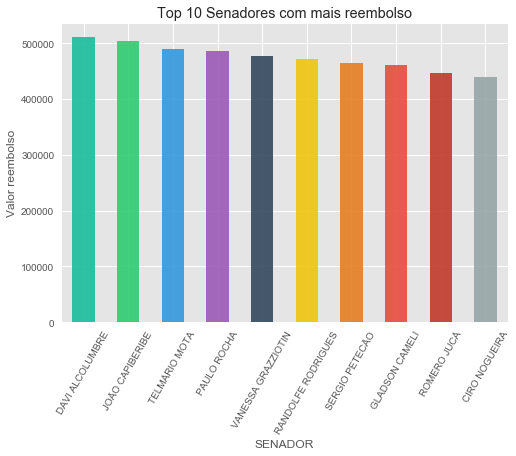

In [56]:
gastadores.head(10).plot(kind="bar", alpha=.9, rot=60, color=["#1abc9c", "#2ecc71", "#3498db", "#9b59b6", "#34495e", "#f1c40f", "#e67e22", "#e74c3c", "#c0392b", "#95a5a6"])
plt.title("Top 10 Senadores com mais reembolso")
plt.ylabel("Valor reembolso")

plt.show()

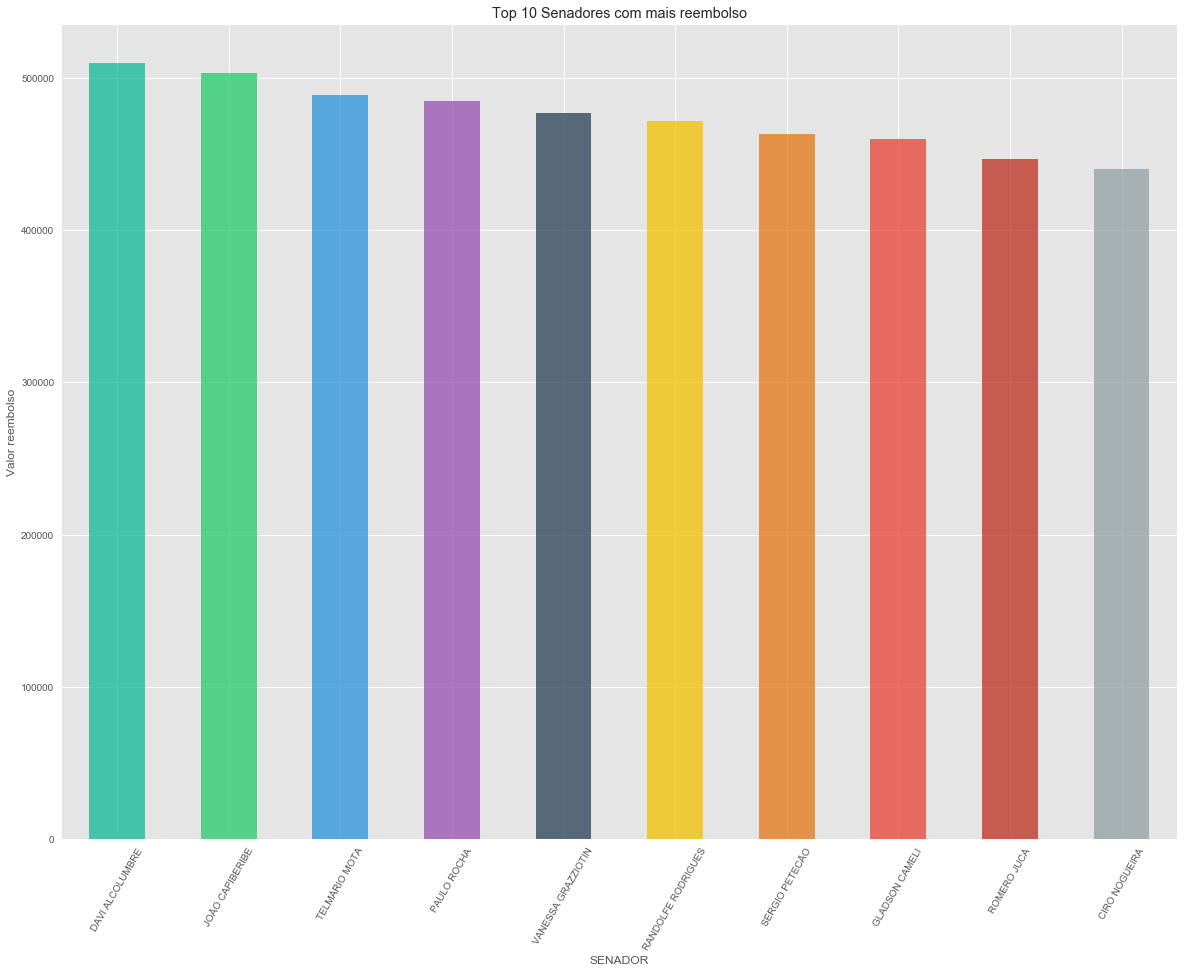

In [57]:
gastadores.head(10).plot(kind="bar", alpha=.8, rot=60, figsize=[20,15], color=["#1abc9c", "#2ecc71", "#3498db", "#9b59b6", "#34495e", "#f1c40f", "#e67e22", "#e74c3c", "#c0392b", "#95a5a6"])
plt.title("Top 10 Senadores com mais reembolso")
plt.ylabel("Valor reembolso")
plt.savefig("top10gastadores.png")
plt.show()

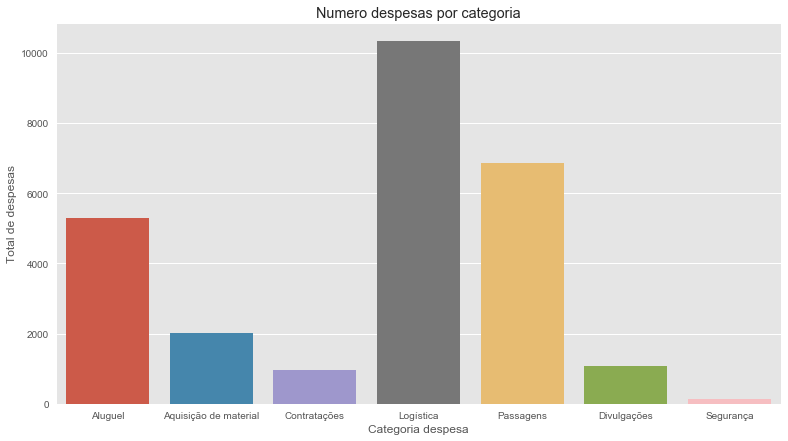

In [58]:
plt.figure(figsize=[13, 7])
sns.countplot(x = df["TIPO_DESPESA"])
plt.title("Numero despesas por categoria")
plt.ylabel("Total de despesas")
plt.xlabel("Categoria despesa")
plt.show()

In [105]:
df["ANO_MES"] = df.DATA.dt.strftime("%Y-%m")

pivot_df = df.pivot_table(index = "ANO_MES", 
                   columns = "TIPO_DESPESA", 
                   values = "VALOR_REEMBOLSADO", 
                   aggfunc = np.sum,
                   fill_value = 0)
pivot_df = pivot_df.loc['2016-01':'2016-12']

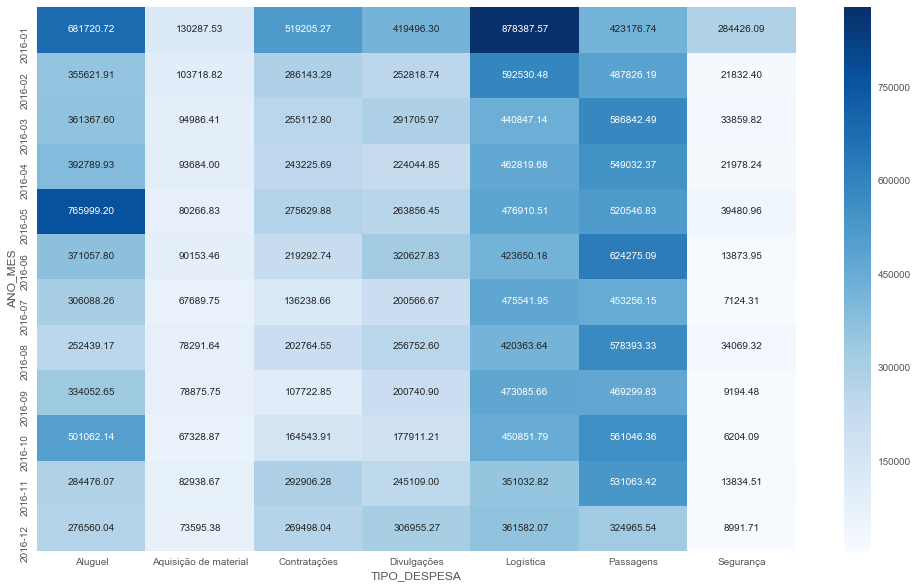

In [121]:
plt.figure(figsize=(17,10))
sns.heatmap(pivot_df, annot=True, fmt='.2f', cmap='Blues') # Se errar o nome o erro mostra as opções de paleta
plt.show()

# Conclusão

Descobrimos durante a análise alguns gastos fora do comum. Gastos de apenas R$0,01 e gastos altíssimos de até R$256.000,00 reais. Percebemos também que os maiores gastos dos senadores costumam ser com lógistica e passagens, aluguel.

Seria interessante mesclar esses dados com as listas de corrupção que temos abertas. Assim poderemos saber com maior probabilidade quais são os senadores que estão abusando dos cofres publicos